<a href="https://colab.research.google.com/github/kumarirakhi19/NYC-Taxi-Trip-Time-Prediction-/blob/main/Copy_of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
# import important library
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.formula.api as sm
sns.set()
import datetime
import warnings; warnings.simplefilter('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# creating the path
path = '/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING/NYC Taxi Data.csv'

In [ ]:
# import the data set
nyc_df = pd.read_csv(path)

Now, we have our dataset which was of the type ‘csv’ in a pandas dataframe which we have named ‘nyc_df’.

# **Exploring the dataset**

Let us look at how does the data in these columns look like

In [ ]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435




Independent Variables

id — a unique identifier for each trip

vendor_id — a code indicating the provider associated with the trip record

pickup_datetime — date and time when the meter was engaged

dropoff_datetime — date and time when the meter was disengaged

passenger_count — the number of passengers in the vehicle (driver entered value)

pickup_longitude — the longitude where the meter was engaged

pickup_latitude — the latitude where the meter was engaged

dropoff_longitude — the longitude where the meter was disengaged

dropoff_latitude — the latitude where the meter was disengaged

store_and_fwd_flag — This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip.


 


Target Variable

trip_duration — duration of the trip in seconds
 



In [ ]:
nyc_df.shape

(1458644, 11)

We see the shape of the dataset is (1458644, 11) which essentially means that there are 1458644 rows and 11 columns in the dataset.

Let’s see what are those 11 columns.

In [ ]:
nyc_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

Let us now look at the datatypes of all these columns.

In [ ]:
nyc_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

We have id, pickup_datetime, dropoff_datetime, and store_and_fwd_flag of the 



vendor_id, passenger_count, and trip_duration are of type int.

pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude are of type float.

In [ ]:
##Check count of unique id's in the dataset
nyc_df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

There are 1458644 unique id's in Training dataset, which is equal to the number of records

There are 2 unique vendor ids.

There are 10 unique passenger counts.

There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N.

Let us see if there are any null values in our dataset.

In [ ]:
nyc_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There is no NaN/NULL record in the dataset, So we dont have to impute any record.

Let us finally check for a statistical summary of our dataset.

Note that this function can provide statistics for numerical features only.

In [ ]:
nyc_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Some insights from the above summary:

Vendor id has a minimum value of 1 and a maximum value of 2 which makes sense as we saw there are two vendor ids 1 and 2.

Passenger count has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.

The minimum trip duration is also quite low. We will come back to this later during Univariate Analysis.
 

# Features Creation

Let us create some new features from the existing variables so that we can gain more insights from the data.

Remember pickup_datetime and dropoff_datetime were both of type object.
If we want to make use of this data, we can convert it to datetime object which contains numerous functions with which we can create new features that we will see soon.

We can convert it to datetime using the following code.

In [ ]:
nyc_df['pickup_datetime'] = pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime'] = pd.to_datetime(nyc_df['dropoff_datetime'])

Let's check , changes in pickup_datetime or dropoff_datetime

In [ ]:
nyc_df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [ ]:
nyc_df['pickup_day']=nyc_df['pickup_datetime'].dt.day_name()
nyc_df['dropoff_day']=nyc_df['dropoff_datetime'].dt.day_name()

In [ ]:
nyc_df['pickup_day_no']=nyc_df['pickup_datetime'].dt.weekday
nyc_df['dropoff_day_no']=nyc_df['dropoff_datetime'].dt.weekday

In [ ]:
nyc_df['pickup_hour']=nyc_df['pickup_datetime'].dt.hour
nyc_df['dropoff_hour']=nyc_df['dropoff_datetime'].dt.hour

In [ ]:
nyc_df['pickup_month']=nyc_df['pickup_datetime'].dt.month
nyc_df['dropoff_month']=nyc_df['dropoff_datetime'].dt.month

We have created the following features:

pickup_day and dropoff_day which will contain the name of the day on which the 
ride was taken.

pickup_day_no and dropoff_day_no which will contain the day number instead of characters with Monday=0 and Sunday=6.

pickup_hour and dropoff_hour with an hour of the day in the 24-hour format.

pickup_month and dropoff_month with month number with January=1 and December=12.

 I have defined a function that lets us determine what time of the day the ride was taken. I have created 4 time zones ‘Morning’ (from 6:00 am to 11:59 pm), ‘Afternoon’ (from 12 noon to 3:59 pm), ‘Evening’ (from 4:00 pm to 9:59 pm), and ‘Late Night’ (from 10:00 pm to 5:59 am)

In [ ]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [ ]:
nyc_df['pickup_time_of_day']=nyc_df['pickup_datetime'].apply(lambda x :time_of_day(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
nyc_df['dropoff_time_of_day']=nyc_df['dropoff_datetime'].apply(lambda x :time_of_day(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

Now let us apply this function and create new columns in the dataset

In [ ]:
nyc_df['pickup_timeofday']=nyc_df['pickup_hour'].apply(time_of_day)
nyc_df['dropoff_timeofday']=nyc_df['dropoff_hour'].apply(time_of_day)

In [ ]:
#check the value of dropoff time of day
nyc_df['dropoff_timeofday'].value_counts()

Evening       489912
Morning       343679
Late night    336741
Afternoon     288312
Name: dropoff_timeofday, dtype: int64

In [ ]:
# calculate duration of the trip
nyc_df['duration_trip'] = nyc_df['dropoff_datetime']-nyc_df['pickup_datetime']

In [ ]:
nyc_df['duration_trip']

0         0 days 00:07:35
1         0 days 00:11:03
2         0 days 00:35:24
3         0 days 00:07:09
4         0 days 00:07:15
                ...      
1458639   0 days 00:12:58
1458640   0 days 00:10:55
1458641   0 days 00:12:44
1458642   0 days 00:06:13
1458643   0 days 00:03:18
Name: duration_trip, Length: 1458644, dtype: timedelta64[ns]

Importing the library which lets us calculate distance from geographical coordinates

In [ ]:
from geopy.distance import great_circle

Defining a function to take coordinates as inputs and return us distance.

In [ ]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

Finally, applying the function to our dataset and creating the feature ‘distance’.

In [ ]:
nyc_df['distance'] = nyc_df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

Now let us re-run and see what the head looks like now with these new features.

In [ ]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_time_of_day,dropoff_time_of_day,pickup_timeofday,dropoff_timeofday,duration_trip,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,0,17,17,3,3,Late night,Late night,Evening,Evening,0 days 00:07:35,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0,6,6,Late night,Late night,Late night,Late night,0 days 00:11:03,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,11,12,1,1,Late night,Late night,Morning,Afternoon,0 days 00:35:24,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,2,19,19,4,4,Late night,Late night,Evening,Evening,0 days 00:07:09,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,5,13,13,3,3,Late night,Late night,Afternoon,Afternoon,0 days 00:07:15,1.188590


# **Univariate Analysis**

The univariate analysis involves studying patterns of all variables individually.

# Target Variable

Let us start by analyzing the target variable.

Let us start by analyzing the target variable.

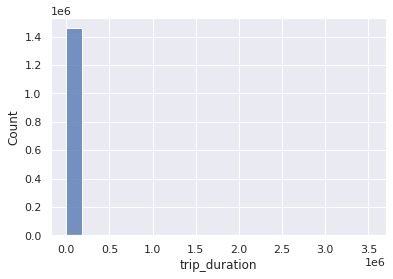

In [ ]:
sns.histplot(nyc_df['trip_duration'],kde=False,bins=20)

The histogram is really skewed as we can see.

Let us also look at the boxplot.

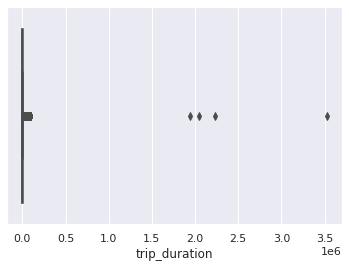

In [ ]:
sns.boxplot(nyc_df['trip_duration'])

We can clearly see an outlier.

In [ ]:
nyc_df['trip_duration'].sort_values(ascending=False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
1034341          1
346102           1
1360664          1
1382872          1
207497           1
Name: trip_duration, Length: 1458644, dtype: int64

We can see that there is an entry which is significantly different from others.

# Vendor id

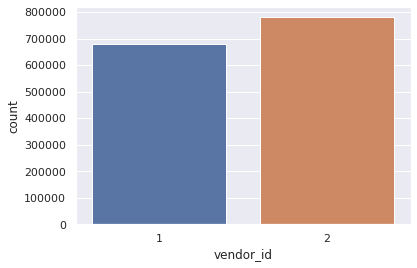

In [ ]:
sns.countplot(x='vendor_id',data=nyc_df)

We see that there is not much difference between the trips taken by both vendors

# Passenger count

In [ ]:
nyc_df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

There are some trips with even 0 passenger count.

There is only 1 trip each for 7,8 and 9 passengers.

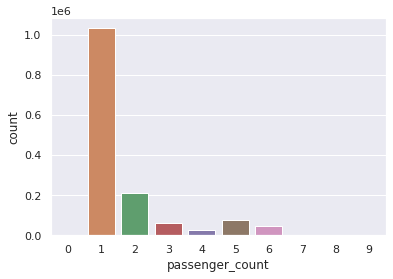

In [ ]:
sns.countplot(x='passenger_count',data=nyc_df)

We see the highest amount of trips are with 1 passenger.

Let us remove the rows which have 0 or 7 or 8 or 9 passenger count.

In [ ]:
nyc_df=nyc_df[nyc_df['passenger_count']!=0]
nyc_df=nyc_df[nyc_df['passenger_count']<=6]

Now, let’s see our value counts again.

In [ ]:
nyc_df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

# Store and Forward Flag

In [ ]:
nyc_df['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994486
Y    0.005514
Name: store_and_fwd_flag, dtype: float64

We see there are less than 1% of trips that were stored before forwarding.

Above result shows that only about 1% of the trip details were stored in the vehicle first before sending it to the server. This might have occured because of the following reasons:

Outstation trips didn't had proper connection at the time when trip completes.

Temporary loss of signals while the trip was about to finish

Inconsistent signal reception over the trip duration.

The GPS or mobile device battery was down when the trip finished.

# Distance

In [ ]:
nyc_df['distance'].value_counts()

0.000000     5887
0.000424       47
0.000424       44
0.000424       36
0.000424       18
             ... 
21.041878       1
1.495052        1
3.397905        1
7.866919        1
2.882464        1
Name: distance, Length: 1452298, dtype: int64

We see there are 2893 trips with 0 km distance.

The reasons for 0 km distance can be:

The dropoff location couldn’t be tracked.

The driver deliberately took this ride to complete a target ride number.

The passengers canceled the trip.

We will analyze these trips further in bivariate analysis

# Trips per day

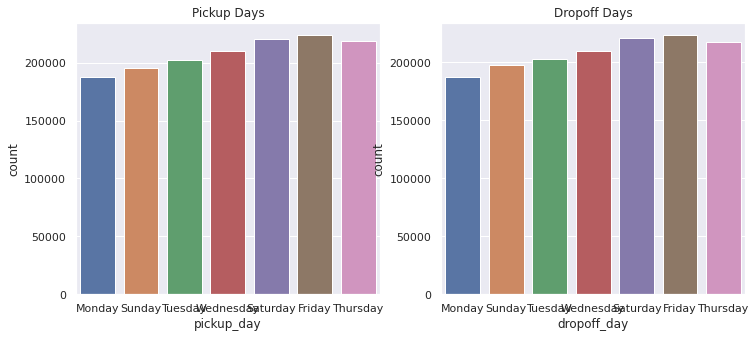

In [ ]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=nyc_df,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=nyc_df,ax=ax2)

We see Fridays are the busiest days followed by Saturdays. That is probably because it’s weekend.

In [ ]:
nyc_df['pickup_day'].value_counts()

Friday       223521
Saturday     220855
Thursday     218566
Wednesday    210132
Tuesday      202745
Sunday       195352
Monday       187408
Name: pickup_day, dtype: int64

In [ ]:
nyc_df['dropoff_day'].value_counts()

Friday       223020
Saturday     220888
Thursday     217738
Wednesday    209786
Tuesday      202513
Sunday       197210
Monday       187424
Name: dropoff_day, dtype: int64

# Trips per Day

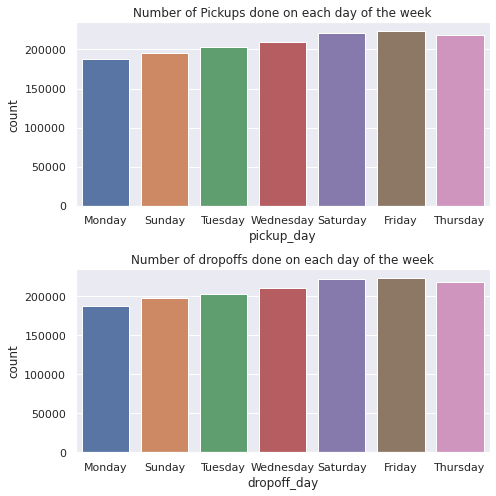

In [ ]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(7,7))
sns.countplot(x='pickup_day',data=nyc_df,ax=ax[0])

ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=nyc_df,ax=ax[1])

ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

**Trips per Hour**

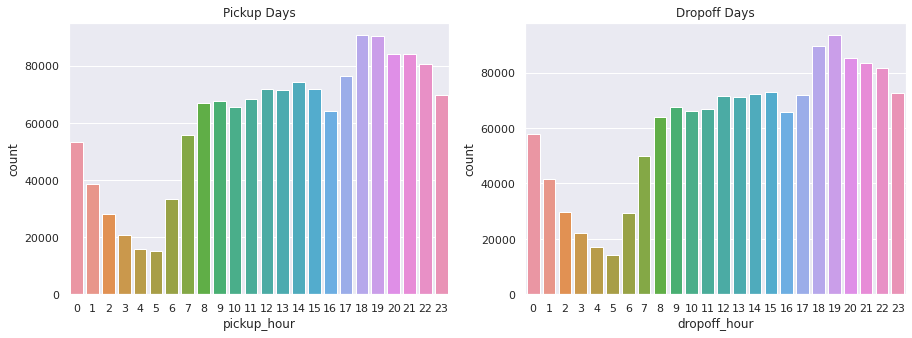

In [ ]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(15,5))
ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=nyc_df,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=nyc_df,ax=ax10)

We see the busiest hours are 6:00 pm to 7:00 pm and that makes sense as this is the time when people return from their offices.

**Trips per Time of Day**

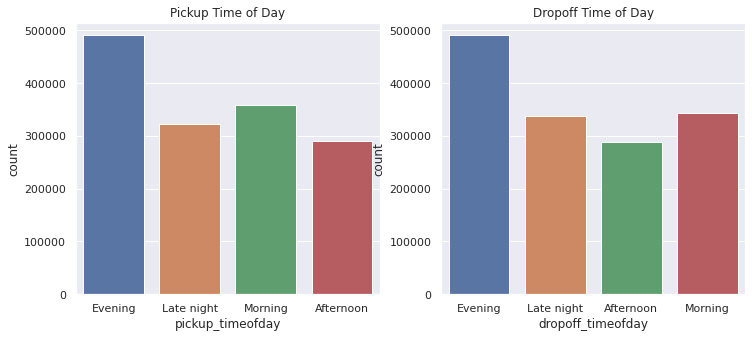

In [ ]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(12,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=nyc_df,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=nyc_df,ax=ax4)

As we saw above, evenings are the busiest

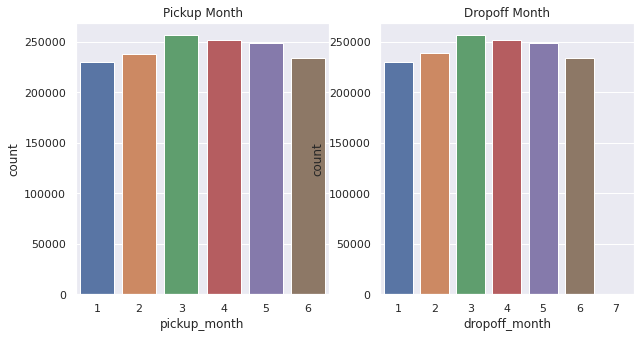

In [ ]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(10,5))
ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=nyc_df,ax=ax11)
ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=nyc_df,ax=ax12)


Text(0.5, 1.0, 'The Average Trip Duration per Dropoff Day of the week')

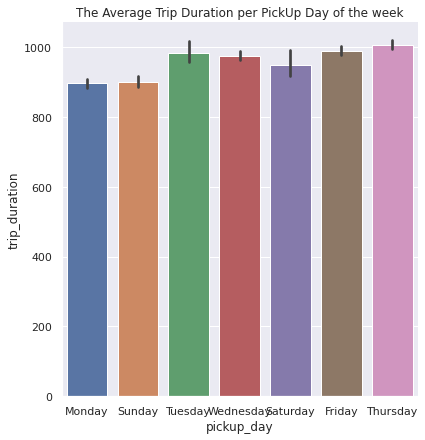

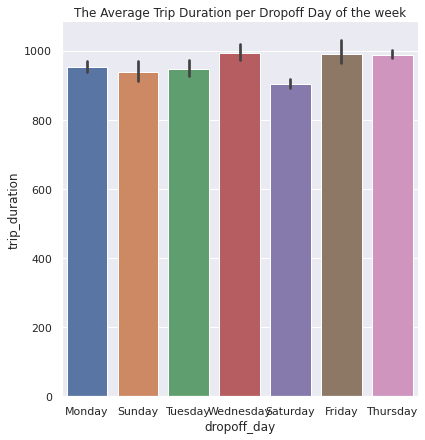

In [ ]:
sns.catplot(x="pickup_day",y="trip_duration",kind="bar",data=nyc_df,height=6,aspect=1)
plt.title('The Average Trip Duration per PickUp Day of the week')
sns.catplot(x="dropoff_day",y="trip_duration",kind="bar",data=nyc_df,height=6,aspect=1)
plt.title('The Average Trip Duration per Dropoff Day of the week')

**Trip Duration per Store and Forward Flag**

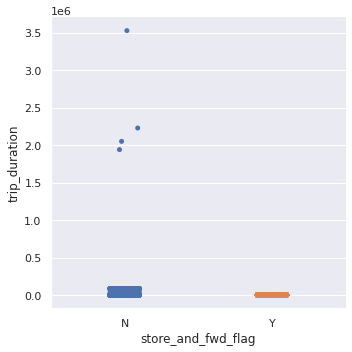

In [ ]:
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="strip",data=nyc_df)

Trip duration is generally longer for trips whose flag was not stored.

**Trip Duration per passenger count**

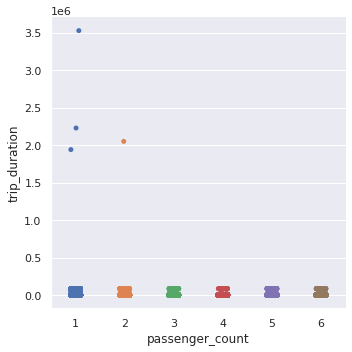

In [ ]:
sns.catplot(y='trip_duration',x='passenger_count',data=nyc_df,kind="strip")

There is no visible relation between trip duration and passenger count

**Trip duration per vendor id**

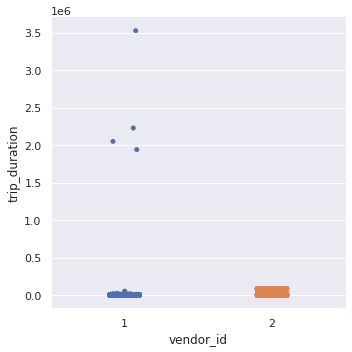

In [ ]:
sns.catplot(x="vendor_id", y="trip_duration",kind="strip",data=nyc_df)

Vendor id 2 takes longer trips as compared to vendor 1.

**Trip Duration per hou**r

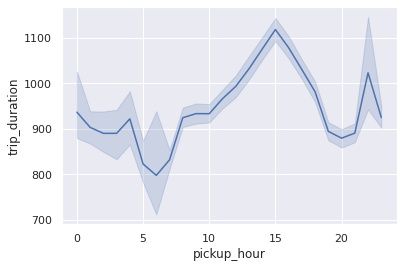

In [ ]:
sns.lineplot(x='pickup_hour',y='trip_duration',data=nyc_df)

We see the trip duration is the maximum around 3 pm which may be because of traffic on the roads.
Trip duration is the lowest around 6 am as streets may not be busy.

**Trip Duration per time of day**

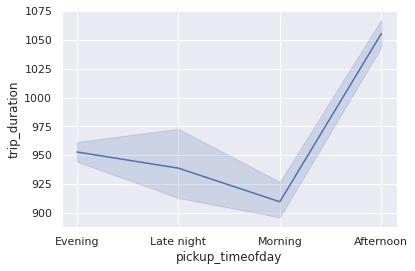

In [ ]:
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=nyc_df)

As we saw above, trip duration is the maximum in the afternoon and lowest between late night and morning.

**Trip Duration per Day of Week**

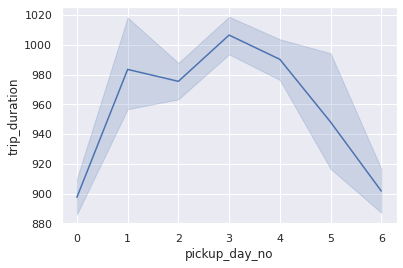

In [ ]:
sns.lineplot(x='pickup_day_no',y='trip_duration',data=nyc_df)

Trip duration is the longest on Thursdays closely followed by Fridays.


**Trip Duration per month**

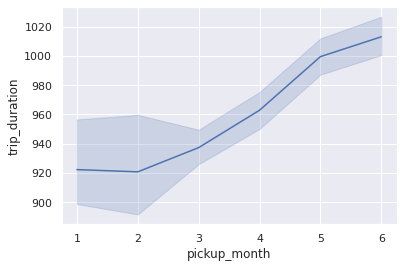

In [ ]:
sns.lineplot(x='pickup_month',y='trip_duration',data=nyc_df)

From February, we can see trip duration rising every month.

In [ ]:
import numpy as np


**Relationships Between Variables**



Now that each feature has been explored individually, I will examine how they relate to the target variable as well as each other. Variables that are highly correlated (correlation cofficient >.70) are likely to convey redudant information and can be removed from the dataset. Reducing the data's dimentionality in this way will make the data easier to work with and allow for better model results.

List the numerical features in decending order by their correlation with trip_duration:

distance: 0.09478990008762113
pickup_latitude: -0.02917556143959524
pickup_longitude: 0.02651552034109458
dropoff_latitude: -0.020649437775950224
dropoff_longitude: 0.01465074226653523
passenger_count: 0.008482219881101427
dropoff_month: 0.007496995994320165
pickup_month: 0.006591528423158377
pickup_hour: 0.0036843360638006543
dropoff_hour: 0.002646208053336974
dropoff_day_no: -0.0018643176143429412
pickup_day_no: -0.0006871420338743639


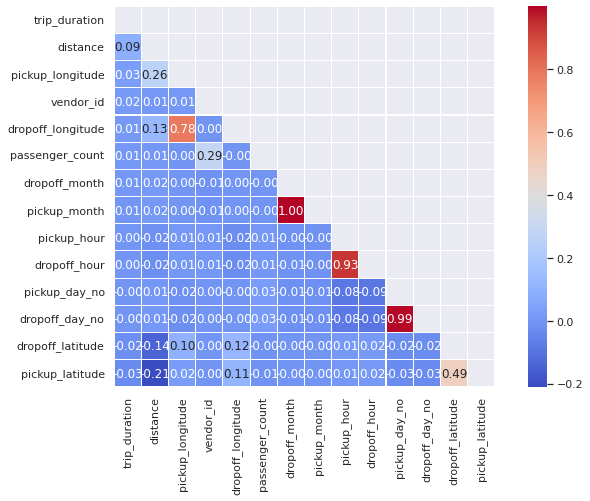

In [ ]:
corr = nyc_df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
cor_dict = corr['trip_duration'].to_dict()
del cor_dict['trip_duration']
print("List the numerical features in decending order by their correlation with trip_duration:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: {1}".format(*ele))
    
# Correlation matrix heatmap
corrmat = nyc_df.corr()
plt.figure(figsize=(12, 7))

# Number of variables for heatmap
k = 76
cols = corrmat.nlargest(k, 'trip_duration')['trip_duration'].index
cm = np.corrcoef(nyc_df[cols].values.T)

# Generate mask for upper triangle
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1)
sns.heatmap(cm, mask=mask, cbar=True, annot=True, square=True,\
                 fmt='.2f',annot_kws={'size': 12}, yticklabels=cols.values,\
                 xticklabels=cols.values, cmap = 'coolwarm',lw = .1)
plt.show() 

**Correlations**

Not suprisingly, the correlation coefficient of the coordinate features: pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, indicates a linear relationship exists between them. However, this correlation is under .50 and is not strong enough to merit removal from the data set.

There is a weak positive correlation between the longitude variables and trip_duration. There is also a weak negative correlation betwen the latitude variables and trip_duration.

Otherwise, there doesn't appear to be much a of a linear relationship between our target variable and the remaining features.

In [ ]:
nyc_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_time_of_day', 'dropoff_time_of_day',
       'pickup_timeofday', 'dropoff_timeofday', 'duration_trip', 'distance'],
      dtype='object')

**Model development**

Now that data is ready for model development, we are finally ready for  - building models! First, I will split the data into training and test sets. Next, I will feed these sets into a number of Regression algorithms to determine which learner is the most performant to use for.

In [ ]:
nyc_df['store_and_fwd_flag'] = nyc_df['store_and_fwd_flag'].map({'N':0,'Y':1})

In [ ]:
# Split
# Create matrix of features
X = nyc_df[['vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag','pickup_month', 'pickup_hour' ,'pickup_day_no'
       ]]# double brackets!

# Create array of target variable 
y = nyc_df['trip_duration']

# Create train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

During the training process, I will apply GridSearchCV() to use the best parameters possible to train the model

# **Decision Tree Regression**

 I will implement a Decision Tree Regressor first for three primary reasons:

it is the easiest to interpret

does not require feature scaling

computationally less expensive than other methods

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate model object
dtree = DecisionTreeRegressor()

# Fit to training data
dtree.fit(X_train,y_train)
print(dtree)

# Predict
y_pred_dtree = dtree.predict(X_test)

# Score It
from sklearn import metrics
print('\nDecision Tree Regression Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred_dtree))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_dtree))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_dtree))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_dtree)))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Decision Tree Regression Performance Metrics
R^2= -2.6017592937938923
MAE: 526.0123990456472
MSE: 35249399.43959193
RMSE: 5937.1204669934


In [ ]:
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# **Learning curve**

Learning curves constitute a great tool to diagnose bias and variance in any supervised learning algorithm. It shows how error changes as the training set size increases. We'll use the learning_curve() function from the scikit-learn library to generate a learning curve for the regression model. There's no need to put aside a validation set because learning_curve() will take care of that and that's why we will plot the learning curve over whole dataset.

In [ ]:
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings; warnings.simplefilter('ignore')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

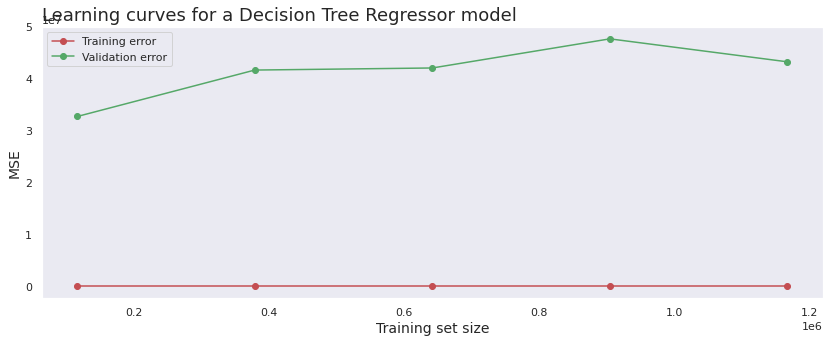

In [ ]:
def learning_curves(estimator, title, features, target, train_sizes, cv, n_jobs=-1):
    plt.figure(figsize = (14,5))
    train_sizes, train_scores, validation_scores = learning_curve(estimator, features, target, train_sizes = train_sizes, cv = cv, scoring = 'neg_mean_squared_error',  n_jobs=n_jobs)
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    
    plt.grid()
    
    plt.plot(train_sizes, train_scores_mean,'o-', color="r", label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean,'o-', color="g", label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    
    title = 'Learning curves for a ' + title + ' model'
    plt.title(title, fontsize = 18, loc='left')
    
    plt.legend(loc="best")
    
    return plt

# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=4)

# Plot learning curve for the RF Regressor
title = "Decision Tree Regressor"

# Call learning curve with all dataset i.e. traininig and test combined because CV will take of data split.
learning_curves(dtree, title, X,y, train_sizes=np.linspace(.1, 1.0, 5), cv=cv, n_jobs=-1)



In [ ]:
# Plot learning curve for the RF Regressor
title = "Random Forest Regressor"

# Call learning curve with all dataset i.e. traininig and test combined because CV will take of data split.
learning_curves(random, title, X,y, train_sizes=np.linspace(.1, 1.0, 5), cv=cv, n_jobs=-1)

NameError: ignored